In [1]:
import numpy as np
from scipy.stats import norm, t, chi2, bernoulli, multivariate_normal, f

import matplotlib.pyplot as plt
from matplotlib import cm, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

# I. Mean

### Samples from normal distribution

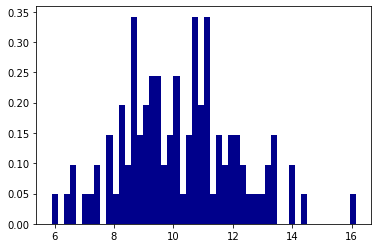

In [2]:
MU = 10
SIGMA = 2
SIZE = 100

SAMPLE = norm.rvs(MU, SIGMA, SIZE)

plt.hist(SAMPLE, density=True, histtype='stepfilled', color='darkblue', bins=50)
plt.show()

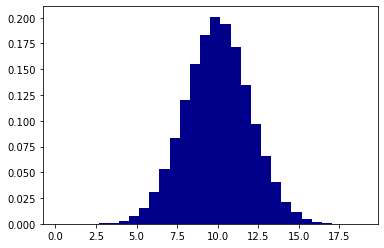

In [3]:
SIZE = 100000
SAMPLE = norm.rvs(MU, SIGMA, SIZE)

plt.hist(SAMPLE, density=True, histtype='stepfilled', color='darkblue', bins=30)
plt.show()

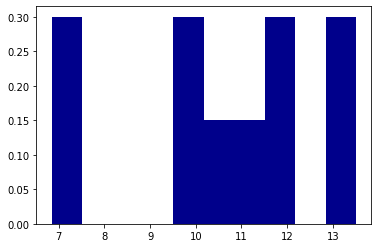

In [4]:
SIZE = 10
SAMPLE = norm.rvs(MU, SIGMA, SIZE)

plt.hist(SAMPLE, density=True, histtype='stepfilled', color='darkblue')
plt.show()

In [5]:
print(SAMPLE)

[13.14498535 12.13337619  6.84506985  9.91659795 10.49176852  9.65768462
 11.50697612 11.53869454 13.51002471  7.15404923]


## Confidence interval for population mean $\mu$ with known variance $\sigma^2$

$$
\left( \mu \right)_{1 - \alpha} = \overline{X} \pm z_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}}
$$

In [6]:
def sample_mean(sample):
    
    return np.mean(sample)

def critical_value_z(alpha):
    
    return norm.isf(alpha / 2)

def CI_mean__variance_known(sample, sigma, alpha):
    
    x_bar  = sample_mean(sample)
    n      = len(sample)
    z_crit = critical_value_z(alpha)
    
    lower_bound = x_bar - z_crit * sigma / np.sqrt(n)
    upper_bound = x_bar + z_crit * sigma / np.sqrt(n)
    
    return (lower_bound, upper_bound)

In [7]:
ALPHA = 0.5

print(CI_mean__variance_known(SAMPLE, SIGMA, ALPHA))

(10.163337934498557, 11.016507482121604)


In [8]:
SAMPLE = norm.rvs(MU, SIGMA, SIZE)

print(CI_mean__variance_known(SAMPLE, SIGMA, ALPHA))

(8.954916534148268, 9.808086081771314)


### The meaning of a confidence interval

In [9]:
NUM_OF_EXPERIMENTS = 10000

NUM_OF_HITS = 0

for EXPERIMENT in range(NUM_OF_EXPERIMENTS):
    
    SAMPLE = norm.rvs(MU, SIGMA, SIZE)
    
    LOWER_BOUND, UPPER_BOUND = CI_mean__variance_known(SAMPLE, SIGMA, ALPHA)
    
    NUM_OF_HITS += (LOWER_BOUND <= MU <= UPPER_BOUND)
    
print(NUM_OF_HITS / NUM_OF_EXPERIMENTS)

0.504


### Changing significance level

In [10]:
ALPHA = 0.05
NUM_OF_EXPERIMENTS = 1000

NUM_OF_HITS = 0

for EXPERIMENT in range(NUM_OF_EXPERIMENTS):
    
    SAMPLE = norm.rvs(MU, SIGMA, SIZE)
    
    LOWER_BOUND, UPPER_BOUND = CI_mean__variance_known(SAMPLE, SIGMA, ALPHA)
    
    NUM_OF_HITS += (LOWER_BOUND <= MU <= UPPER_BOUND)
    
print(NUM_OF_HITS / NUM_OF_EXPERIMENTS)

0.946


### Comparison of different sample sizes with fixed significance level

In [11]:
SIZES = [10, 100, 1000]

for size in SIZES:
    
    SAMPLE = norm.rvs(MU, SIGMA, size)
    
    LOWER_BOUND, UPPER_BOUND = CI_mean__variance_known(SAMPLE, SIGMA, ALPHA)
    
    print('n =', size, ': \tU - L =', UPPER_BOUND - LOWER_BOUND)
#     print('n =', size, ': \t', CI_mean__variance_known(SAMPLE, SIGMA, ALPHA))

n = 10 : 	U - L = 2.4791801292182463
n = 100 : 	U - L = 0.7839855938160234
n = 1000 : 	U - L = 0.2479180129218257


### Comparison of different confidence levels with fixed sample size

In [12]:
ALPHAS = [0.9, 0.5, 0.1]

for alpha in ALPHAS:
    
    SAMPLE = norm.rvs(MU, SIGMA, SIZE)
    
    LOWER_BOUND, UPPER_BOUND = CI_mean__variance_known(SAMPLE, SIGMA, alpha)
    
    print('1 - alpha =', round(1 - alpha, 2), ': \tU - L =', UPPER_BOUND - LOWER_BOUND)

1 - alpha = 0.1 : 	U - L = 0.15895042796258707
1 - alpha = 0.5 : 	U - L = 0.8531695476230468
1 - alpha = 0.9 : 	U - L = 2.080593551502229


## Confidence interval for population mean $\mu$ with unknown variance

$$
\left( \mu \right)_{1 - \alpha} = \overline{X} \pm t_{n-1; \; \alpha / 2} \cdot \dfrac{s}{\sqrt{n}}
$$

In [13]:
def sample_std(sample):
    
    n = len(sample)
    
    return np.sqrt((np.sum(sample**2) - n * sample_mean(sample)**2) / (n - 1))

def critical_value_t(df, alpha):
    
    return t.isf(alpha / 2, df)

def CI_mean__variance_unknown(sample, alpha):
    
    x_bar  = sample_mean(sample)
    n      = len(sample)
    s      = sample_std(sample)
    t_crit = critical_value_t(n-1, alpha)
    
    lower_bound = x_bar - t_crit * s / np.sqrt(n)
    upper_bound = x_bar + t_crit * s / np.sqrt(n)
    
    return (lower_bound, upper_bound)

In [14]:
ALPHA = 0.05
SIZE = 10

SAMPLE = norm.rvs(MU, SIGMA, SIZE)

print('variance is known:\t',   CI_mean__variance_known(SAMPLE, SIGMA, ALPHA))
print('variance is unknown:\t', CI_mean__variance_unknown(SAMPLE, ALPHA))

variance is known:	 (9.08305593514574, 11.562236064363987)
variance is unknown:	 (8.508604717398967, 12.13668728211076)


### When variance is unknown, but sample size is big

In [15]:
SIZE = 100

SAMPLE = norm.rvs(MU, SIGMA, SIZE)

print('z-value:\t', CI_mean__variance_known(SAMPLE, SIGMA, ALPHA))
print('t-value:\t', CI_mean__variance_unknown(SAMPLE, ALPHA))

z-value:	 (9.410825196261863, 10.194810790077886)
t-value:	 (9.387866057456876, 10.217769928882873)
